## Importing Libraries and Data Loading

In [34]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('diabetic_data.csv', na_values=['?'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_8588\1993141517.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('diabetic_data.csv', na_values=['?'])


In [9]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


## Data Preprocessing Visualization

In [21]:
df.isnull().sum()/df.shape[0] *100

encounter_id                 0.000000
patient_nbr                  0.000000
race                         2.233555
gender                       0.000000
age                          0.000000
weight                      96.858479
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.020636
diag_2                       0.351787
diag_3                       1.398306
number_diagnoses             0.000000
max_glu_serum               94.746772
A1Cresult                   83.277322
metformin                    0.000000
repaglinide                  0.000000
nateglinide 

percentage of some columns is so much so we can just drop them 

In [23]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [24]:
cols_to_drop = ['weight', 'payer_code', 'medical_specialty', 'max_glu_serum', 'A1Cresult']

In [25]:
df1 = df.copy()
df1.drop(cols_to_drop, axis=1, inplace=True)

In [27]:
df1.dropna().shape[0]/df1.shape[0]

0.9635143368119018

now we can drop null values

In [28]:
df1.dropna(inplace=True)

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98053 entries, 1 to 101765
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              98053 non-null  int64 
 1   patient_nbr               98053 non-null  int64 
 2   race                      98053 non-null  object
 3   gender                    98053 non-null  object
 4   age                       98053 non-null  object
 5   admission_type_id         98053 non-null  int64 
 6   discharge_disposition_id  98053 non-null  int64 
 7   admission_source_id       98053 non-null  int64 
 8   time_in_hospital          98053 non-null  int64 
 9   num_lab_procedures        98053 non-null  int64 
 10  num_procedures            98053 non-null  int64 
 11  num_medications           98053 non-null  int64 
 12  number_outpatient         98053 non-null  int64 
 13  number_emergency          98053 non-null  int64 
 14  number_inpatient          

In [67]:
categorical_cols = []
numerical_cols = []
for col in df1.columns:
    if df1[col].dtype == object:
        if col in ['diag_1', 'diag_2', 'diag_3']:
            continue
        categorical_cols.append(col)
    else:
        numerical_cols.append(col)

In [68]:
categorical_cols

['race',
 'gender',
 'age',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted']

In [69]:
numerical_cols

['encounter_id',
 'patient_nbr',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses']

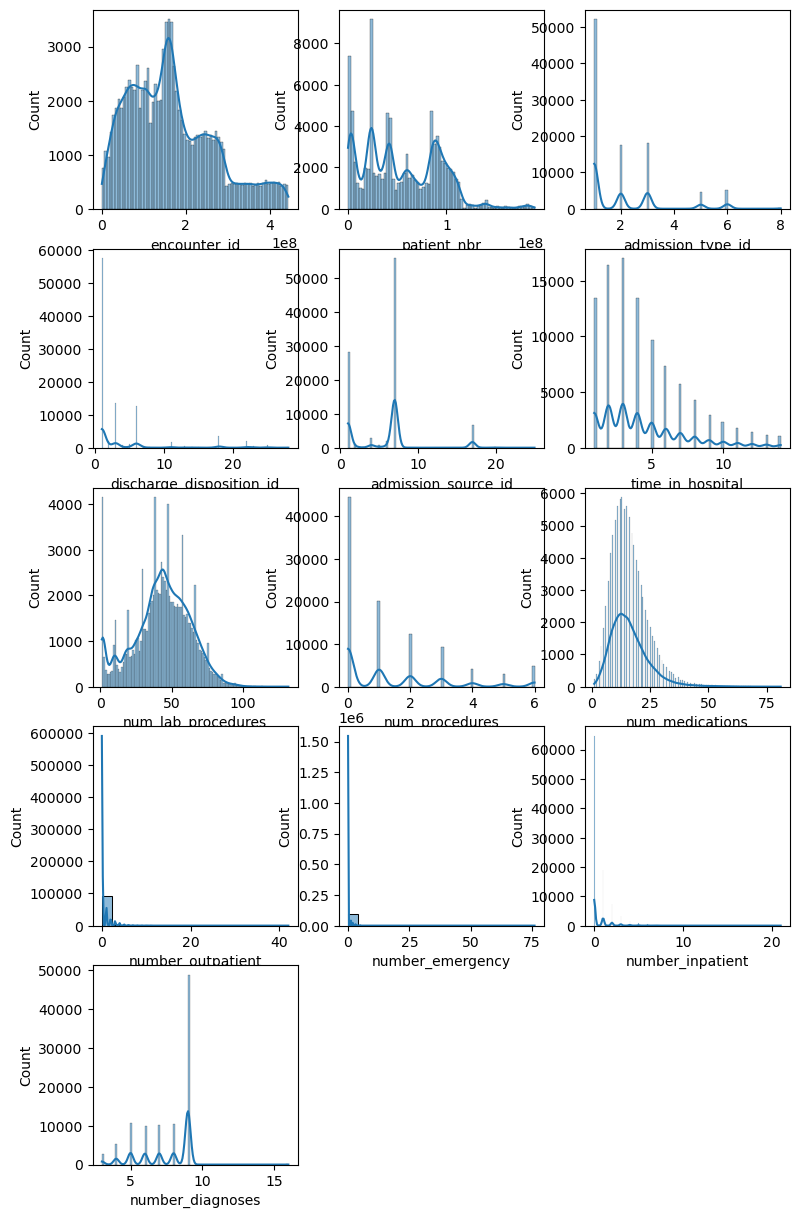

In [131]:
plt.figure(figsize=(9,15))
for i, col in enumerate(numerical_cols):
    plt.subplot(5,3,i+1)
    sns.histplot(df1[col], kde=True)

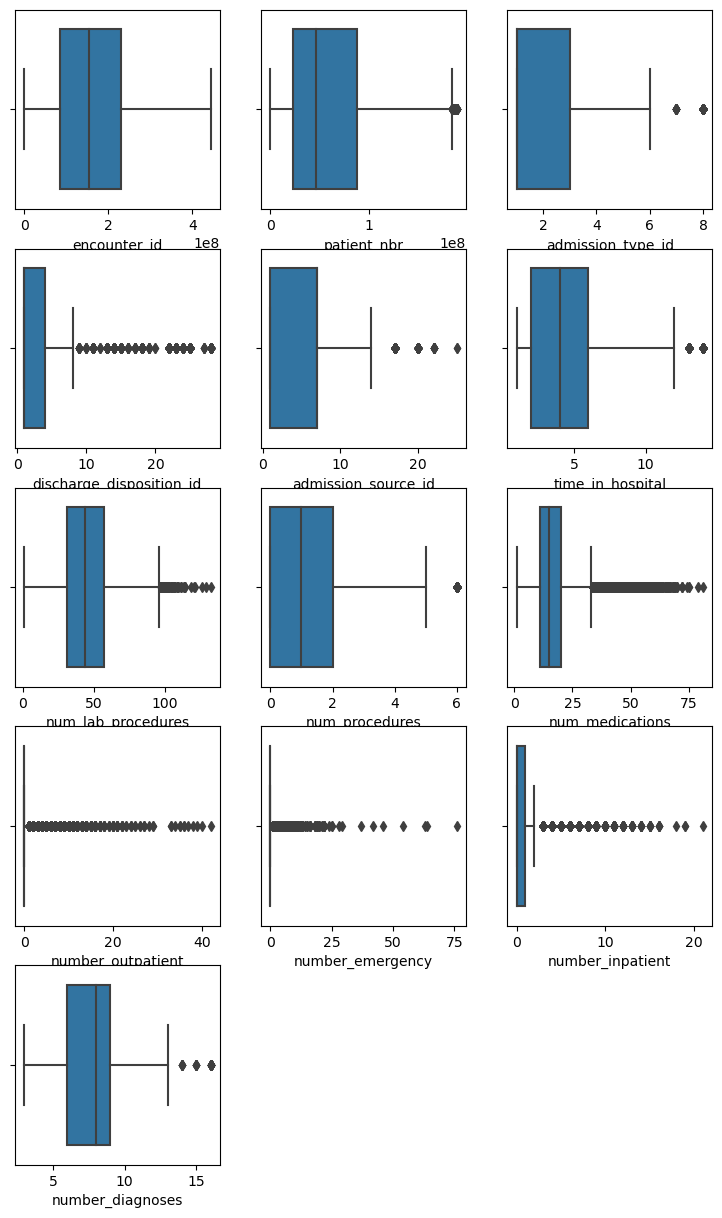

In [133]:
plt.figure(figsize=(9,15))
for i, col in enumerate(numerical_cols):
    plt.subplot(5,3,i+1)
    sns.boxplot(x=df1[col])

In [71]:
len(categorical_cols)

29

In [72]:
for col in categorical_cols:
    print(f"{col}: {df1[col].unique()}")

race: ['Caucasian' 'AfricanAmerican' 'Other' 'Asian' 'Hispanic']
gender: ['Female' 'Male' 'Unknown/Invalid']
age: ['[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)' '[70-80)'
 '[80-90)' '[90-100)' '[0-10)']
metformin: ['No' 'Steady' 'Up' 'Down']
repaglinide: ['No' 'Up' 'Steady' 'Down']
nateglinide: ['No' 'Steady' 'Down' 'Up']
chlorpropamide: ['No' 'Steady' 'Down' 'Up']
glimepiride: ['No' 'Steady' 'Down' 'Up']
acetohexamide: ['No' 'Steady']
glipizide: ['No' 'Steady' 'Up' 'Down']
glyburide: ['No' 'Steady' 'Up' 'Down']
tolbutamide: ['No' 'Steady']
pioglitazone: ['No' 'Steady' 'Up' 'Down']
rosiglitazone: ['No' 'Steady' 'Up' 'Down']
acarbose: ['No' 'Steady' 'Up' 'Down']
miglitol: ['No' 'Steady' 'Down' 'Up']
troglitazone: ['No' 'Steady']
tolazamide: ['No' 'Steady' 'Up']
examide: ['No']
citoglipton: ['No']
insulin: ['Up' 'No' 'Steady' 'Down']
glyburide-metformin: ['No' 'Steady' 'Down' 'Up']
glipizide-metformin: ['No' 'Steady']
glimepiride-pioglitazone: ['No' 'Steady']
metformin-rosi

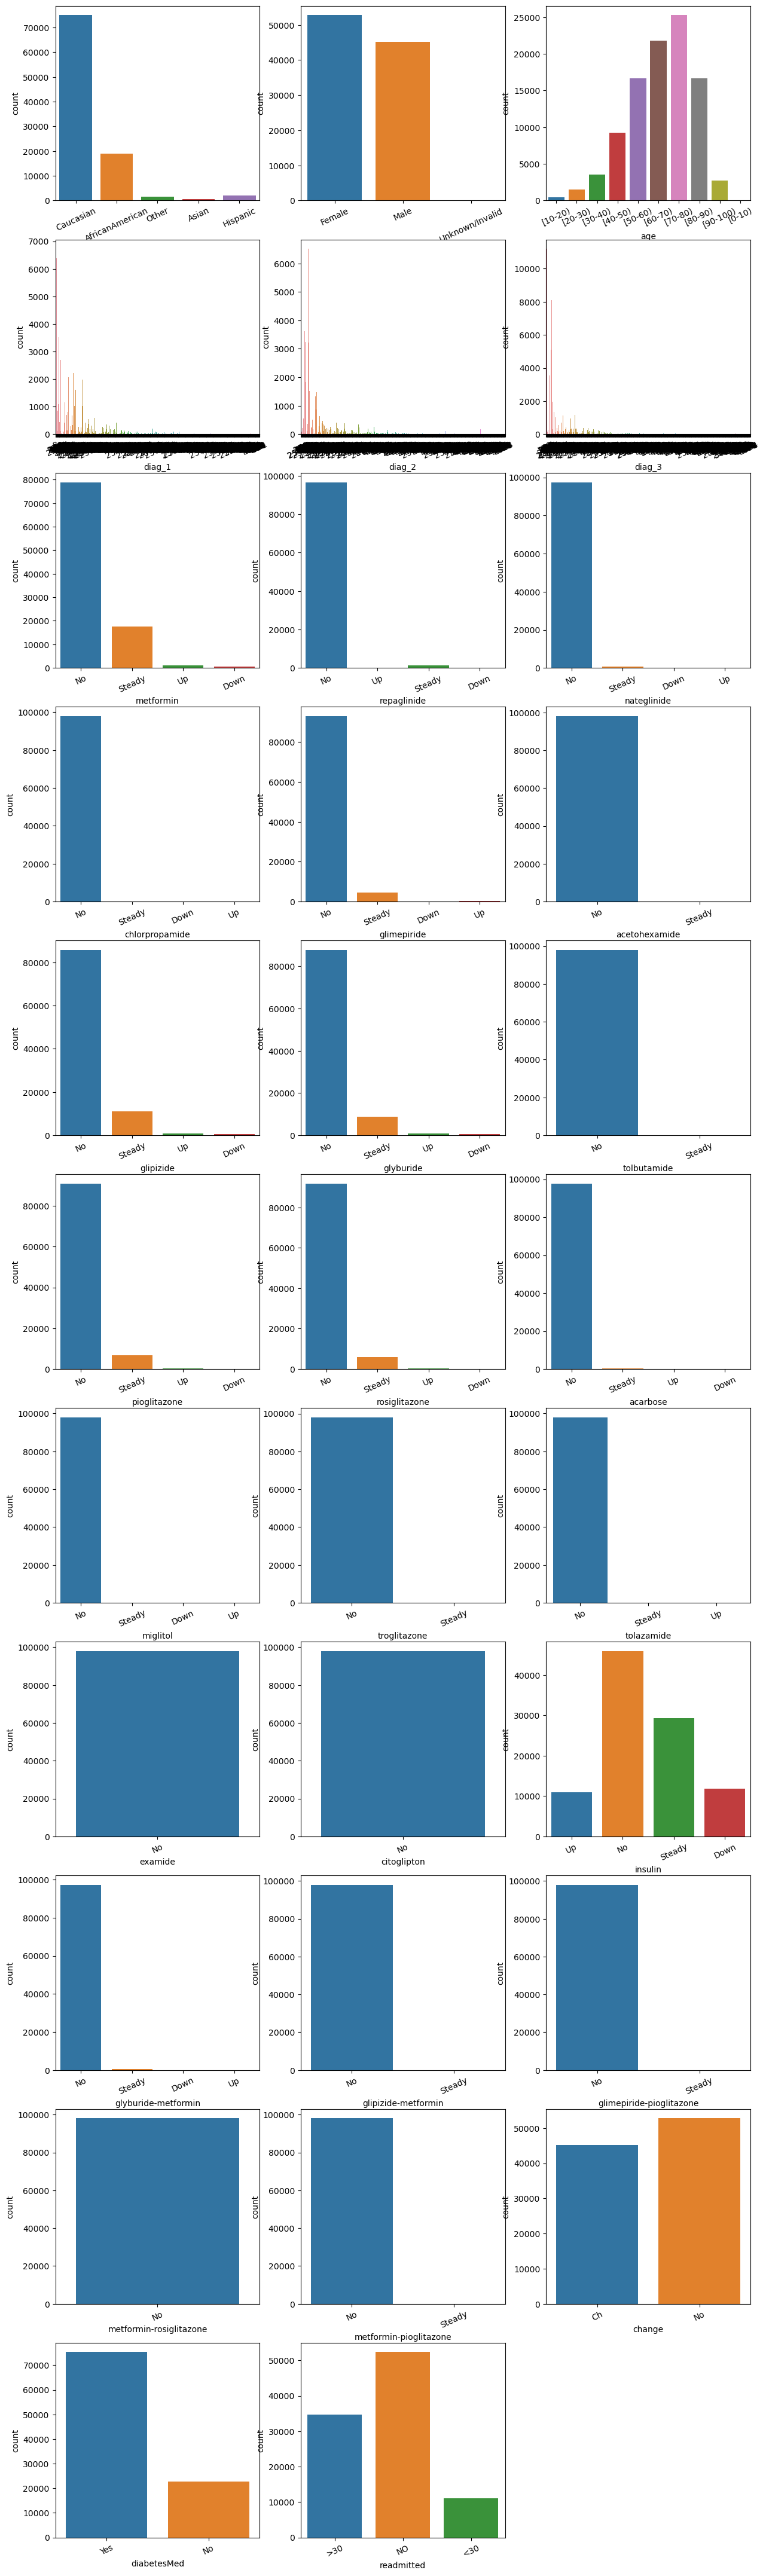

In [66]:
plt.figure(figsize=(15,55))
for i, col in enumerate(categorical_cols):
    plt.subplot(11,3,i+1)
    sns.countplot(x=df1[col])
    plt.xticks(rotation=25)

In [107]:
df_encoded = pd.get_dummies(df1[categorical_cols[:-1]], dtype=int, drop_first=True)
df_encoded

,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male,gender_Unknown/Invalid,age_[10-20),age_[20-30),age_[30-40),age_[40-50),...,insulin_Steady,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes
1,0,1,0,0,0,0,1,0,0,0,...,0,1,1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,1
3,0,1,0,0,1,0,0,0,1,0,...,0,1,1,0,0,0,0,0,0,1
4,0,1,0,0,1,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,1
5,0,1,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
101762,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,1
101763,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
101764,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1


In [146]:
df2 = pd.concat([df1[numerical_cols], df_encoded, df1['readmitted']], axis=1)
df2.head()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes,readmitted
1,149190,55629189,1,1,7,3,59,0,18,0,...,1,1,0,0,0,0,0,0,1,>30
2,64410,86047875,1,1,7,2,11,5,13,2,...,0,1,0,0,0,0,0,1,1,NO
3,500364,82442376,1,1,7,2,44,1,16,0,...,1,1,0,0,0,0,0,0,1,NO
4,16680,42519267,1,1,7,1,51,0,8,0,...,0,1,0,0,0,0,0,0,1,NO
5,35754,82637451,2,1,2,3,31,6,16,0,...,0,1,0,0,0,0,0,1,1,>30


In [147]:
df2['readmitted'].value_counts()

readmitted
NO     52338
>30    34649
<30    11066
Name: count, dtype: int64

In [148]:
df2['readmitted'] = df2['readmitted'].map({'>30':1, '<30':1, 'NO':0})

In [149]:
df2['readmitted'].value_counts()

readmitted
0    52338
1    45715
Name: count, dtype: int64

In [150]:
df2.drop(['encounter_id', 'patient_nbr'], axis=1, inplace=True)

In [151]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98053 entries, 1 to 101765
Data columns (total 76 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   admission_type_id                98053 non-null  int64
 1   discharge_disposition_id         98053 non-null  int64
 2   admission_source_id              98053 non-null  int64
 3   time_in_hospital                 98053 non-null  int64
 4   num_lab_procedures               98053 non-null  int64
 5   num_procedures                   98053 non-null  int64
 6   num_medications                  98053 non-null  int64
 7   number_outpatient                98053 non-null  int64
 8   number_emergency                 98053 non-null  int64
 9   number_inpatient                 98053 non-null  int64
 10  number_diagnoses                 98053 non-null  int64
 11  race_Asian                       98053 non-null  int32
 12  race_Caucasian                   98053 non-null  i

<Axes: >

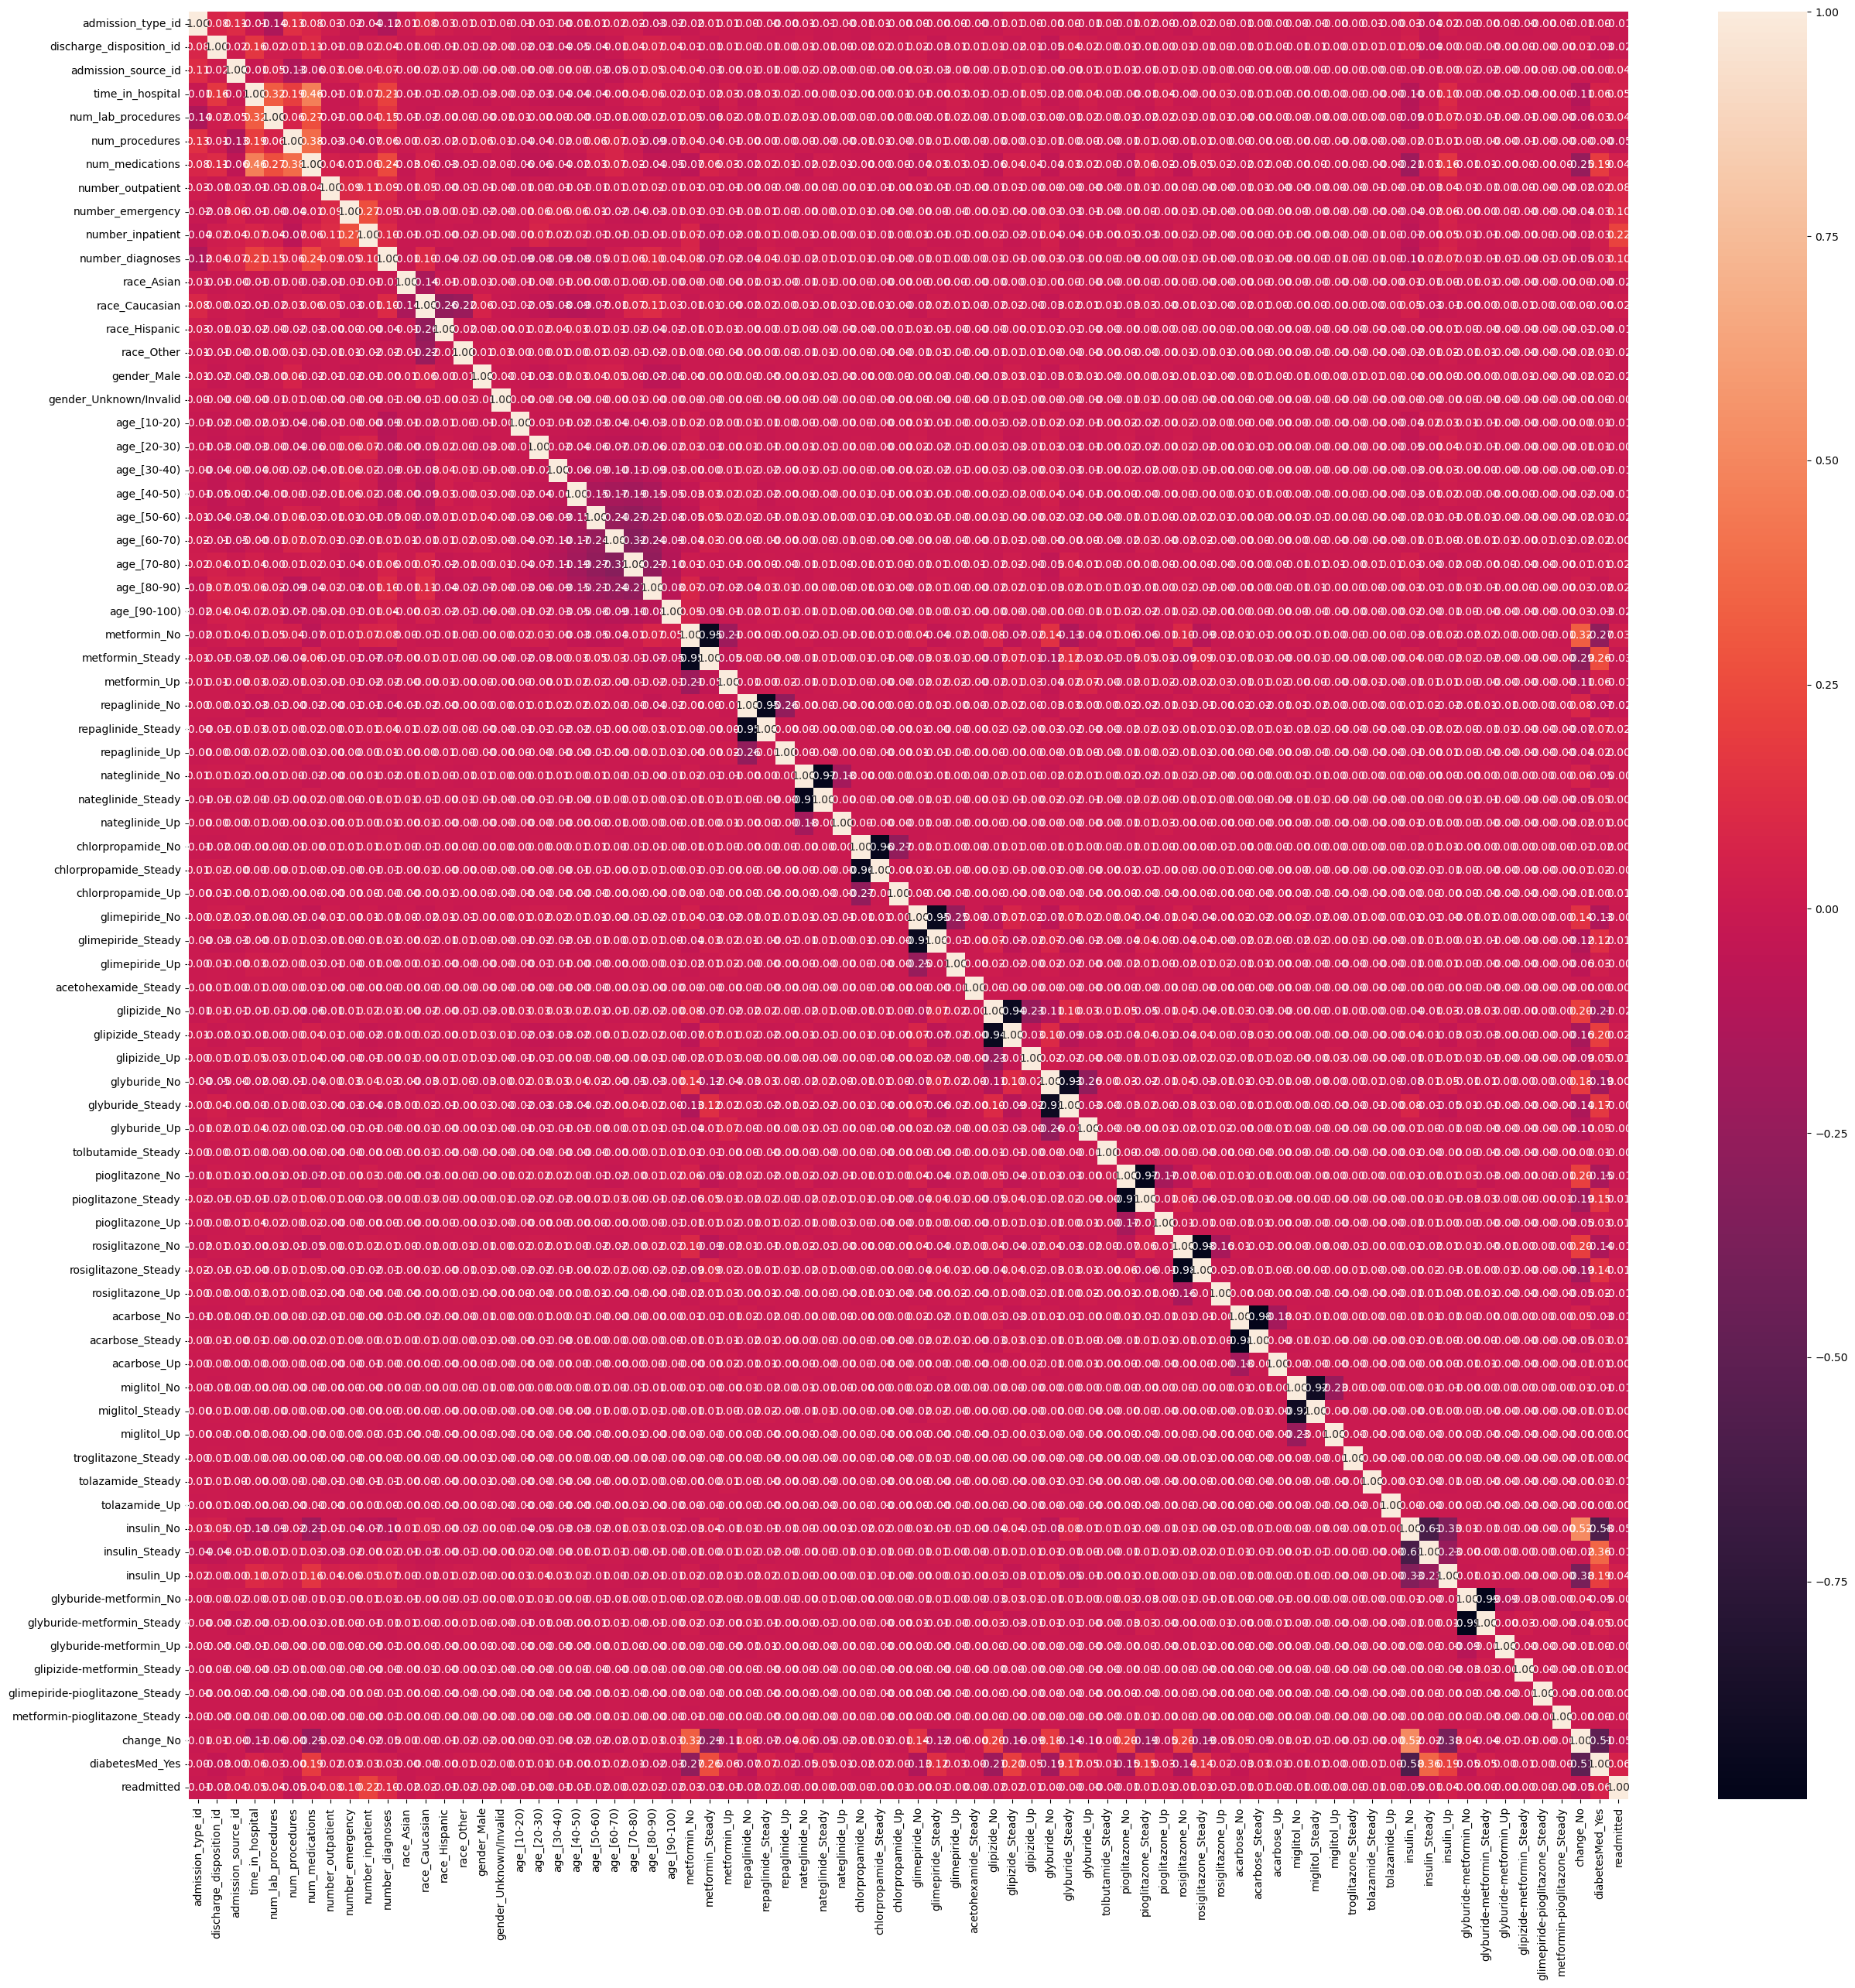

In [152]:
plt.figure(figsize=(30,30))
sns.heatmap(df2.corr(), annot=True, fmt="0.2f")

In [153]:
df2.corr()['readmitted'].describe()

count    76.000000
mean      0.019915
std       0.119480
min      -0.045962
25%      -0.009347
50%       0.000338
75%       0.011367
max       1.000000
Name: readmitted, dtype: float64

In [164]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

## Model Building

In [165]:
x = df2.drop('readmitted', axis=1)
y = df2['readmitted']

In [166]:
x = np.log(x+1)

In [167]:
df2.isnull().sum()

admission_type_id                  0
discharge_disposition_id           0
admission_source_id                0
time_in_hospital                   0
num_lab_procedures                 0
                                  ..
glimepiride-pioglitazone_Steady    0
metformin-pioglitazone_Steady      0
change_No                          0
diabetesMed_Yes                    0
readmitted                         0
Length: 76, dtype: int64

In [168]:
x_scaled = mms.fit_transform(x)

In [169]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=0)

In [170]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape 

((78442, 75), (19611, 75), (78442,), (19611,))

In [171]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix, classification_report

In [221]:
def model_fit_and_results(model, model_name, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    results = {
        'Model': model_name,
        'Train Accuracy': accuracy_score(y_train, y_train_pred),
        'Test Accuracy': accuracy_score(y_test, y_test_pred),
        'F1 Score - Class 0': f1_score(y_test, y_test_pred, average=None)[0],
        'F1 Score - Class 1': f1_score(y_test, y_test_pred, average=None)[1],
        'Precision - Class 0': precision_score(y_test, y_test_pred, average=None)[0],
        'Precision - Class 1': precision_score(y_test, y_test_pred, average=None)[1],
        'Recall - Class 0': recall_score(y_test, y_test_pred, average=None)[0],
        'Recall - Class 1': recall_score(y_test, y_test_pred, average=None)[1]
    }
    print(classification_report(y_test, y_test_pred))
    cm = confusion_matrix(y_test, y_test_pred)
    return results, cm

In [222]:
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(),
          GradientBoostingClassifier(), XGBClassifier()]

In [223]:
models_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost']

In [224]:
results_list=[]
cm_list=[]
for i in range(len(models)):
    print(models_names[i])
    result, cm = model_fit_and_results(models[i], models_names[i], x_train, x_test, y_train, y_test)
    results_list.append(result)
    cm_list.append(cm)

Logistic Regression
              precision    recall  f1-score   support

           0       0.61      0.77      0.68     10379
           1       0.63      0.44      0.52      9232

    accuracy                           0.62     19611
   macro avg       0.62      0.61      0.60     19611
weighted avg       0.62      0.62      0.60     19611

Decision Tree
              precision    recall  f1-score   support

           0       0.58      0.58      0.58     10379
           1       0.53      0.52      0.52      9232

    accuracy                           0.55     19611
   macro avg       0.55      0.55      0.55     19611
weighted avg       0.55      0.55      0.55     19611

Random Forest
              precision    recall  f1-score   support

           0       0.63      0.72      0.67     10379
           1       0.62      0.52      0.56      9232

    accuracy                           0.62     19611
   macro avg       0.62      0.62      0.62     19611
weighted avg       0.62   

In [207]:
import tensorflow 
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD

In [217]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), metrics=['accuracy'], loss='binary_crossentropy')
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
1962/1962 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5412 - loss: 0.6887 - val_accuracy: 0.6162 - val_loss: 0.6561
Epoch 2/50
1962/1962 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5972 - loss: 0.6667 - val_accuracy: 0.6218 - val_loss: 0.6504
Epoch 3/50
1962/1962 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6031 - loss: 0.6612 - val_accuracy: 0.6083 - val_loss: 0.6573
Epoch 4/50
1962/1962 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6077 - loss: 0.6596 - val_accuracy: 0.6248 - val_loss: 0.6509
Epoch 5/50
1962/1962 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6114 - loss: 0.6577 - val_accuracy: 0.6202 - val_loss: 0.6494
Epoch 6/50
1962/1962 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6075 - loss: 0.6575 - val_accuracy: 0.6196 - val_loss: 0.6496
Epoch 7/50
1962/1962 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6171 - loss: 0.6537 - val_accuracy: 0.6201 - val_loss: 0.6494
Epoch 8/50
1962/1962 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6176 - loss: 0.6523 - 

1962/1962 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6289 - loss: 0.6426 - val_accuracy: 0.6257 - val_loss: 0.6452


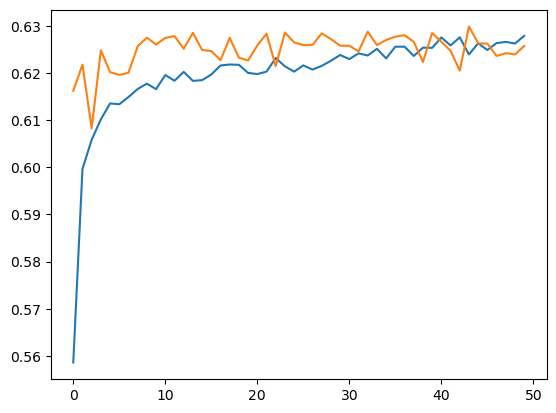

In [218]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

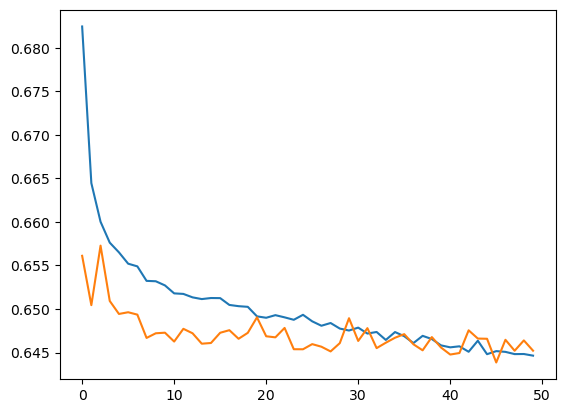

In [219]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [230]:
y_pred_prob = model.predict(x_test)  
y_pred = (y_pred_prob > 0.5).astype(int)  
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

613/613 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
0.6202641374738667
              precision    recall  f1-score   support

           0       0.61      0.79      0.69     10379
           1       0.65      0.43      0.52      9232

    accuracy                           0.62     19611
   macro avg       0.63      0.61      0.60     19611
weighted avg       0.63      0.62      0.61     19611



In [227]:
y_pred_prob_train = model.predict(x_train)  
y_pred_train = (y_pred_prob_train > 0.5).astype(int) 
accuracy_score(y_train, y_pred_train)

2452/2452 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


0.6321613421381402

## Results

In [232]:
results_list.append({
        'Model': 'Neural Network',
        'Train Accuracy': accuracy_score(y_train, y_pred_train),
        'Test Accuracy': accuracy_score(y_test, y_pred),
        'F1 Score - Class 0': f1_score(y_test, y_pred, average=None)[0],
        'F1 Score - Class 1': f1_score(y_test, y_pred, average=None)[1],
        'Precision - Class 0': precision_score(y_test, y_pred, average=None)[0],
        'Precision - Class 1': precision_score(y_test, y_pred, average=None)[1],
        'Recall - Class 0': recall_score(y_test, y_pred, average=None)[0],
        'Recall - Class 1': recall_score(y_test, y_pred, average=None)[1]
    })

In [233]:
results_df = pd.DataFrame(results_list)
results_df

,Model,Train Accuracy,Test Accuracy,F1 Score - Class 0,F1 Score - Class 1,Precision - Class 0,Precision - Class 1,Recall - Class 0,Recall - Class 1
0,Logistic Regression,0.620777,0.616032,0.680228,0.519587,0.608171,0.632102,0.771654,0.441075
1,Decision Tree,0.999860,0.553414,0.580194,0.522985,0.577316,0.525964,0.583100,0.520039
2,Random Forest,0.999860,0.622814,0.667566,0.564139,0.625590,0.618555,0.715580,0.518523
3,Gradient Boosting,0.637771,0.633063,0.687809,0.555033,0.625602,0.646686,0.763754,0.486135
4,XGBoost,0.685679,0.638723,0.681244,0.583113,0.639011,0.638284,0.729454,0.536720
5,Neural Network,0.632161,0.620264,0.687639,0.515831,0.608899,0.645146,0.789768,0.429701


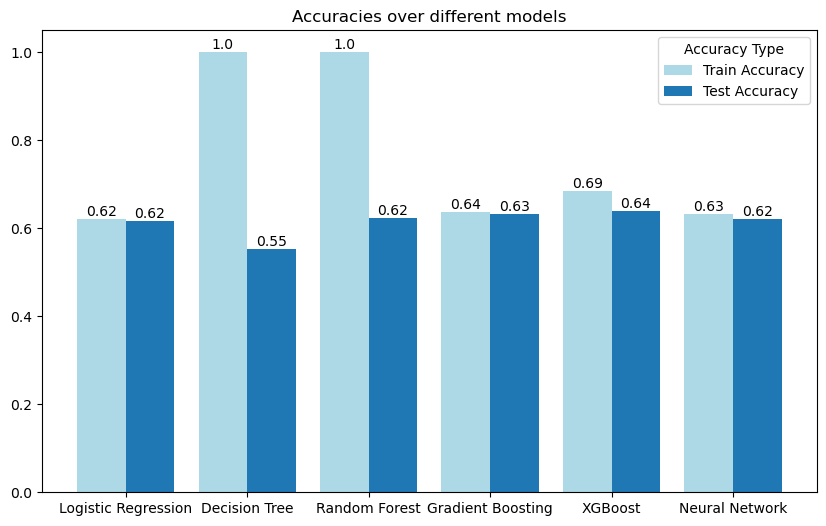

In [237]:
w_bar=0.4
plt.figure(figsize=(10,6))
plt.title('Accuracies over different models')
bar1 = np.arange(len(results_df['Model']))
bar2 = [i+w_bar for i in bar1]
bars_train = plt.bar(data=results_df, x=bar1, height='Train Accuracy', width=w_bar, color='lightblue')
bars_test = plt.bar(data=results_df, x=bar2, height='Test Accuracy', width=w_bar)
plt.bar_label(bars_train, labels=results_df['Train Accuracy'].round(2))
plt.bar_label(bars_test, labels=results_df['Test Accuracy'].round(2))
plt.xticks(bar1+w_bar/2,results_df['Model'])
plt.legend(handles=[bars_train, bars_test], title='Accuracy Type', labels=['Train Accuracy', 'Test Accuracy'])
plt.show()

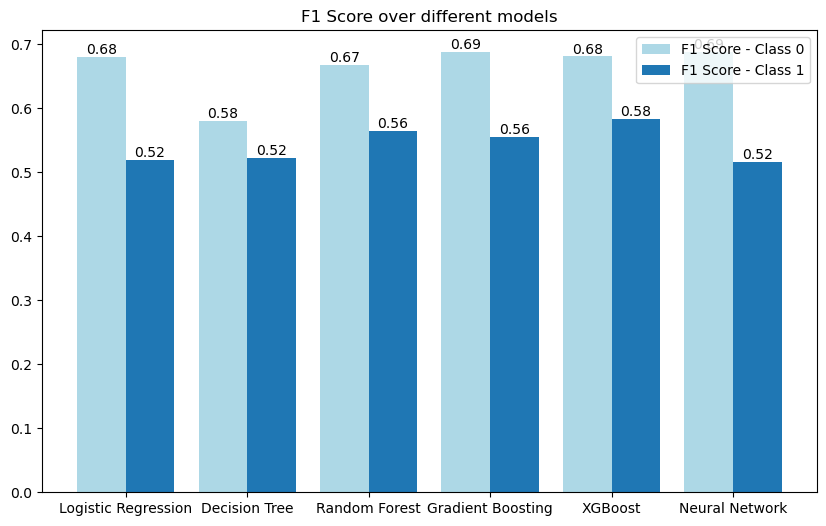

In [238]:
w_bar=0.4
plt.figure(figsize=(10,6))
plt.title('F1 Score over different models')
bar1 = np.arange(len(results_df['Model']))
bar2 = [i+w_bar for i in bar1]
bars_0 = plt.bar(data=results_df, x=bar1, height='F1 Score - Class 0', width=w_bar, color='lightblue')
bars_1 = plt.bar(data=results_df, x=bar2, height='F1 Score - Class 1', width=w_bar)
plt.bar_label(bars_0, labels=results_df['F1 Score - Class 0'].round(2))
plt.bar_label(bars_1, labels=results_df['F1 Score - Class 1'].round(2))
plt.xticks(bar1+w_bar/2,results_df['Model'])
plt.legend(handles=[bars_0, bars_1], labels=['F1 Score - Class 0', 'F1 Score - Class 1'])
plt.show()

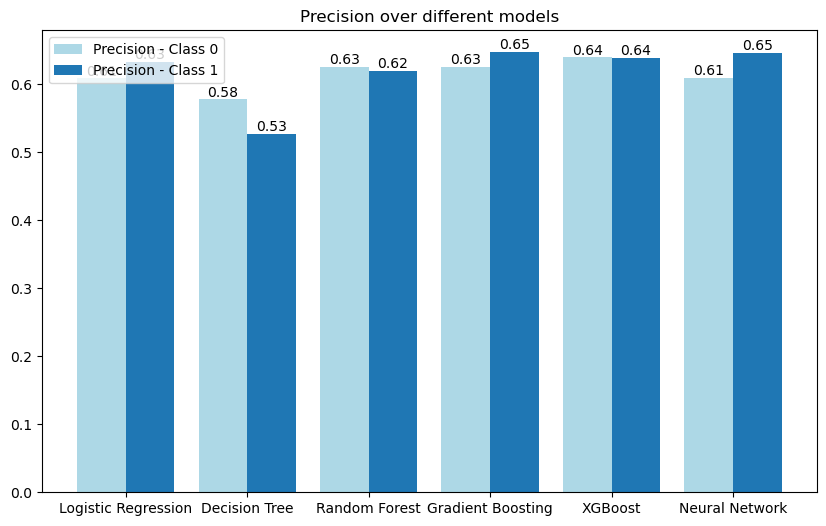

In [239]:
w_bar=0.4
plt.figure(figsize=(10,6))
plt.title('Precision over different models')
bar1 = np.arange(len(results_df['Model']))
bar2 = [i+w_bar for i in bar1]
bars_0 = plt.bar(data=results_df, x=bar1, height='Precision - Class 0', width=w_bar, color='lightblue')
bars_1 = plt.bar(data=results_df, x=bar2, height='Precision - Class 1', width=w_bar)
plt.bar_label(bars_0, labels=results_df['Precision - Class 0'].round(2))
plt.bar_label(bars_1, labels=results_df['Precision - Class 1'].round(2))
plt.xticks(bar1+w_bar/2,results_df['Model'])
plt.legend(handles=[bars_0, bars_1], labels=['Precision - Class 0', 'Precision - Class 1'])
plt.show()

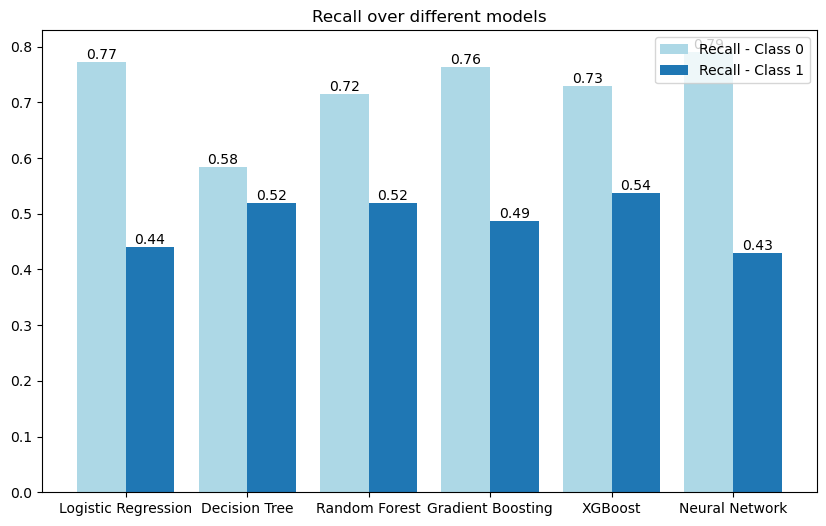

In [240]:
w_bar=0.4
plt.figure(figsize=(10,6))
plt.title('Recall over different models')
bar1 = np.arange(len(results_df['Model']))
bar2 = [i+w_bar for i in bar1]
bars_0 = plt.bar(data=results_df, x=bar1, height='Recall - Class 0', width=w_bar, color='lightblue')
bars_1 = plt.bar(data=results_df, x=bar2, height='Recall - Class 1', width=w_bar)
plt.bar_label(bars_0, labels=results_df['Recall - Class 0'].round(2))
plt.bar_label(bars_1, labels=results_df['Recall - Class 1'].round(2))
plt.xticks(bar1+w_bar/2,results_df['Model'])
plt.legend(handles=[bars_0, bars_1], labels=['Recall - Class 0', 'Recall - Class 1'])
plt.show()

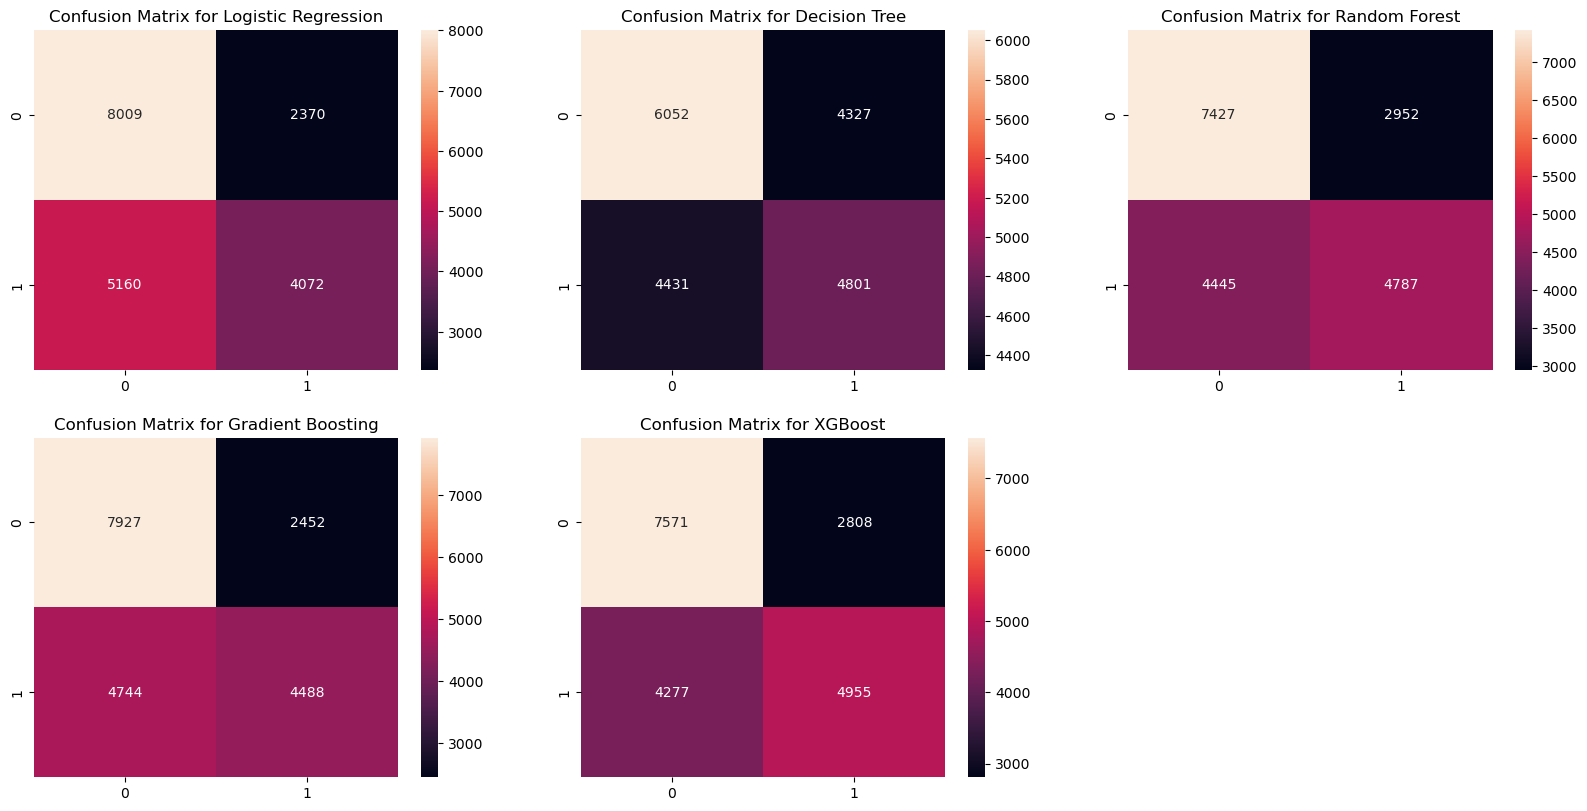

In [247]:
plt.figure(figsize=(20,15))
for i in range(len(cm_list)):
    plt.subplot(3,3,i+1)
    plt.title(f"Confusion Matrix for {models_names[i]}")
    sns.heatmap(cm_list[i], annot=True, fmt='0.0f')
plt.show()

<Axes: >

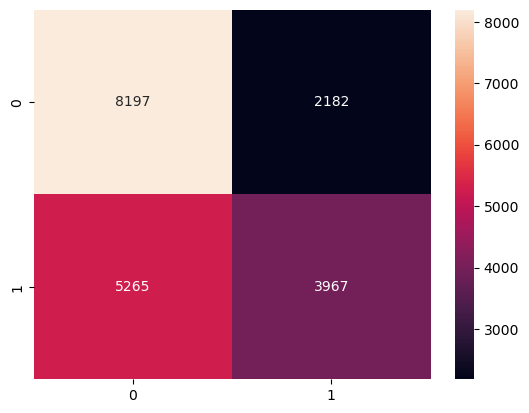

In [246]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='0.0f')